# /*** Adult Census Dataset Missing Values Imputation ***/

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.imputation import CategoricalImputer, \
                                      MeanMedianImputer, \
                                      ArbitraryNumberImputer, \
                                      RandomSampleImputer

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
dfad = pd.read_csv(url, names=columns, na_values='?', skipinitialspace=True)
data = dfad.copy()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


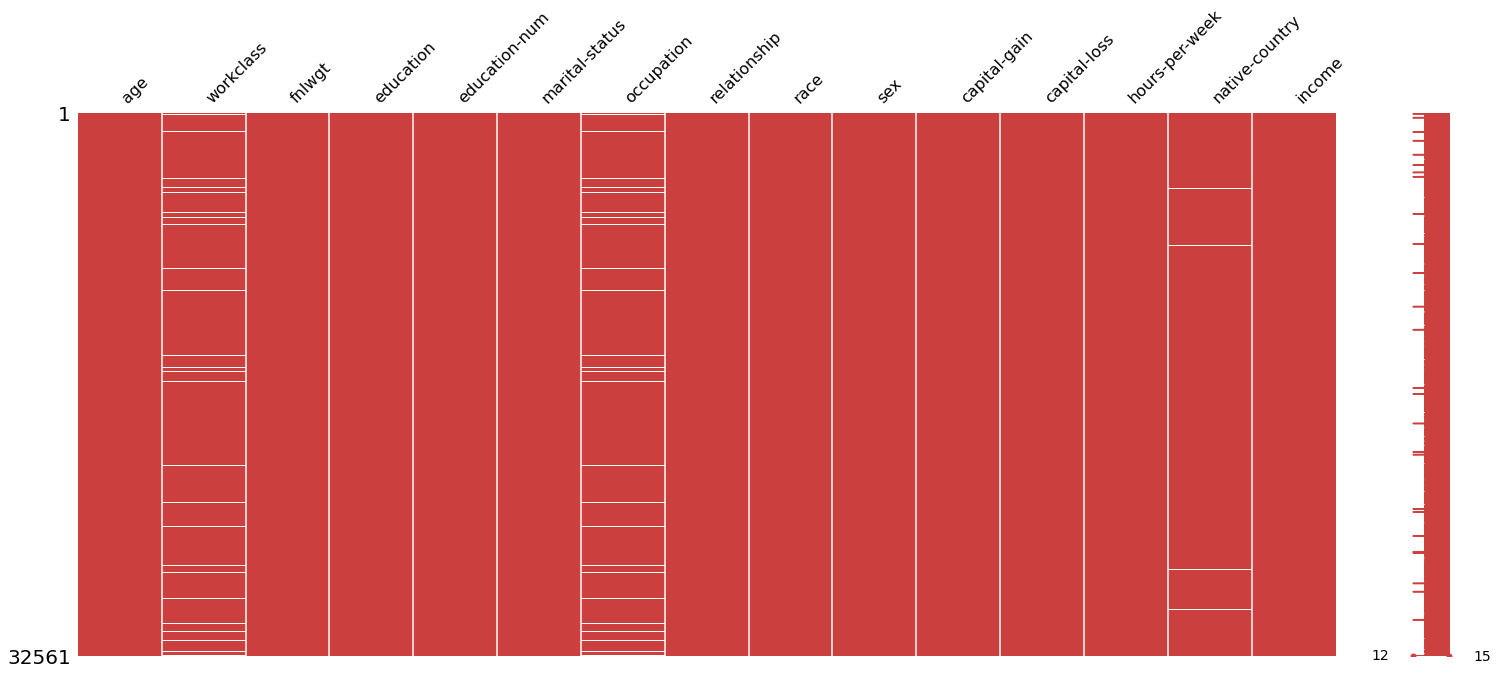

In [3]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing data
msno.matrix(dfad,color=(0.80, 0.25, 0.25))
plt.show()

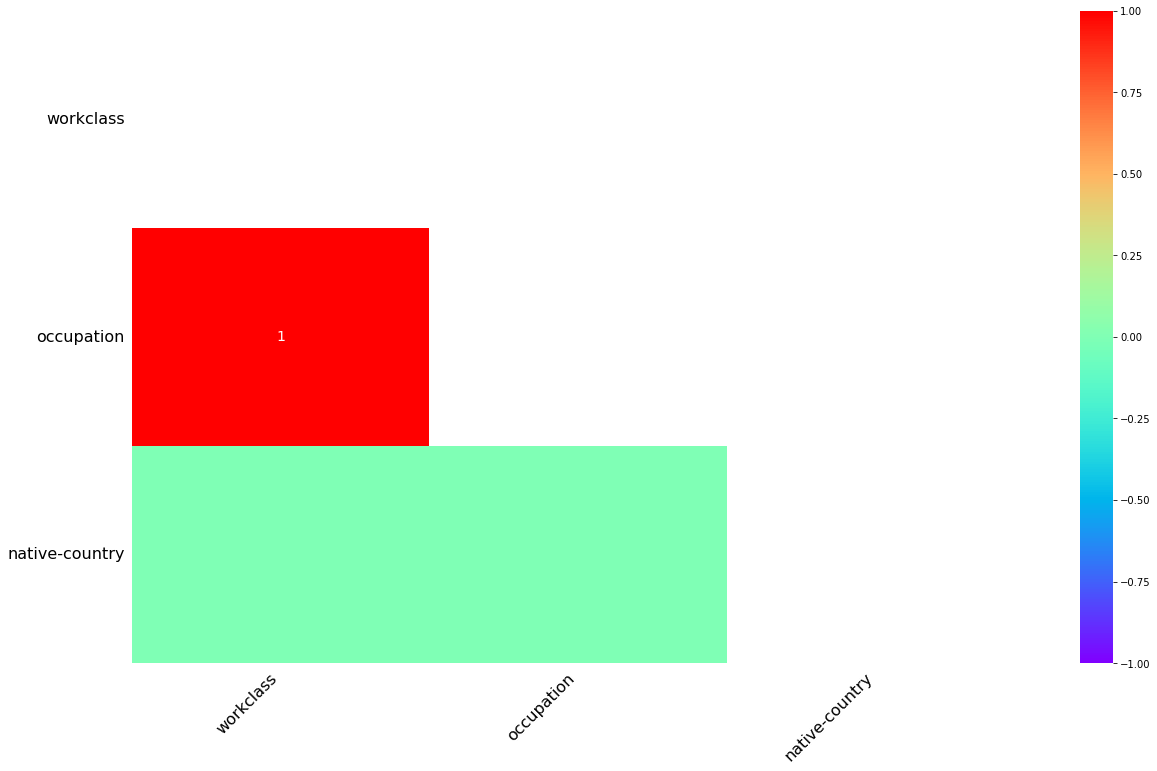

In [4]:
msno.heatmap(dfad,cmap = 'rainbow')
plt.show()

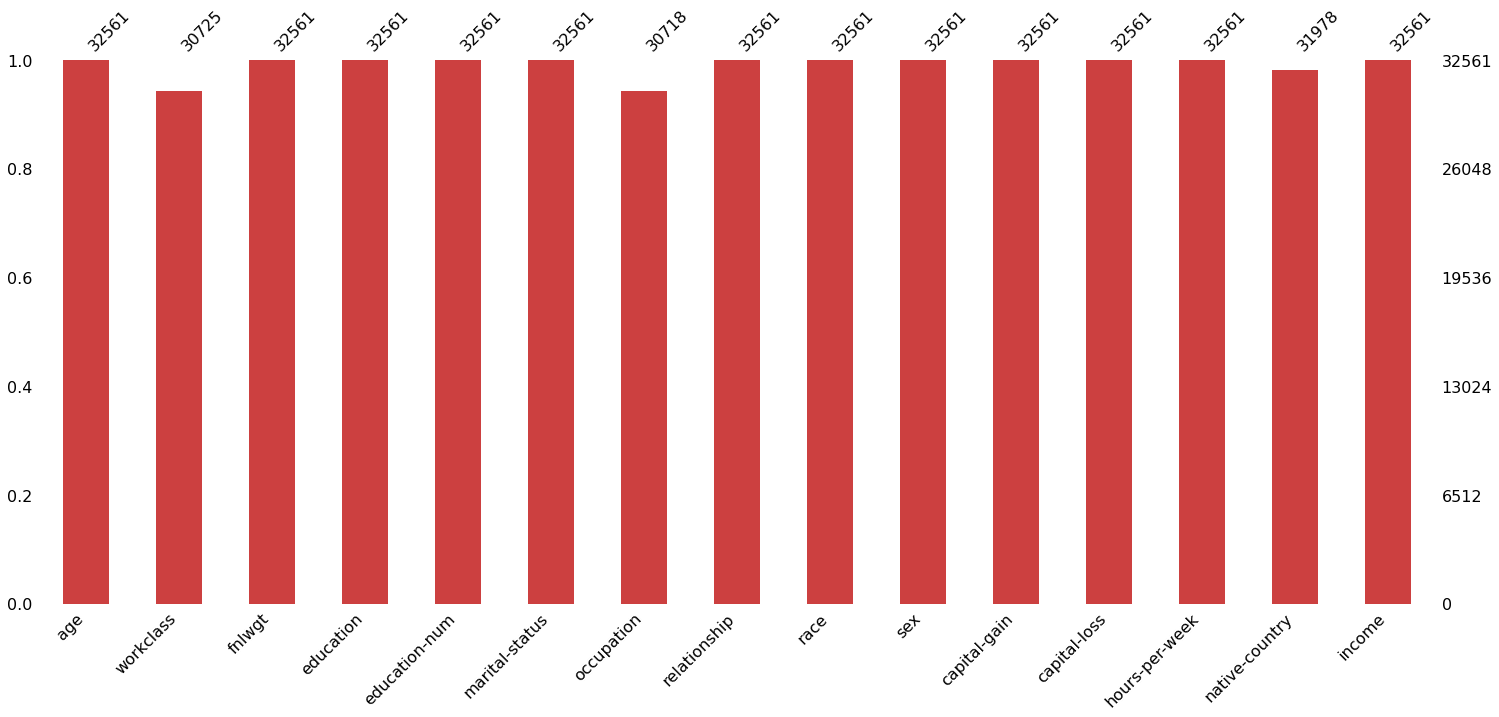

In [5]:
msno.bar(dfad,color=(0.80, 0.25, 0.25))
plt.show()

In [6]:
data = dfad.copy()
# Handle categorical variables (workclass, occupation, native-country)
categorical_columns = ['workclass', 'occupation', 'native-country']

## 6) Adding a category to capture missing values

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
#Unknown#            1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            325

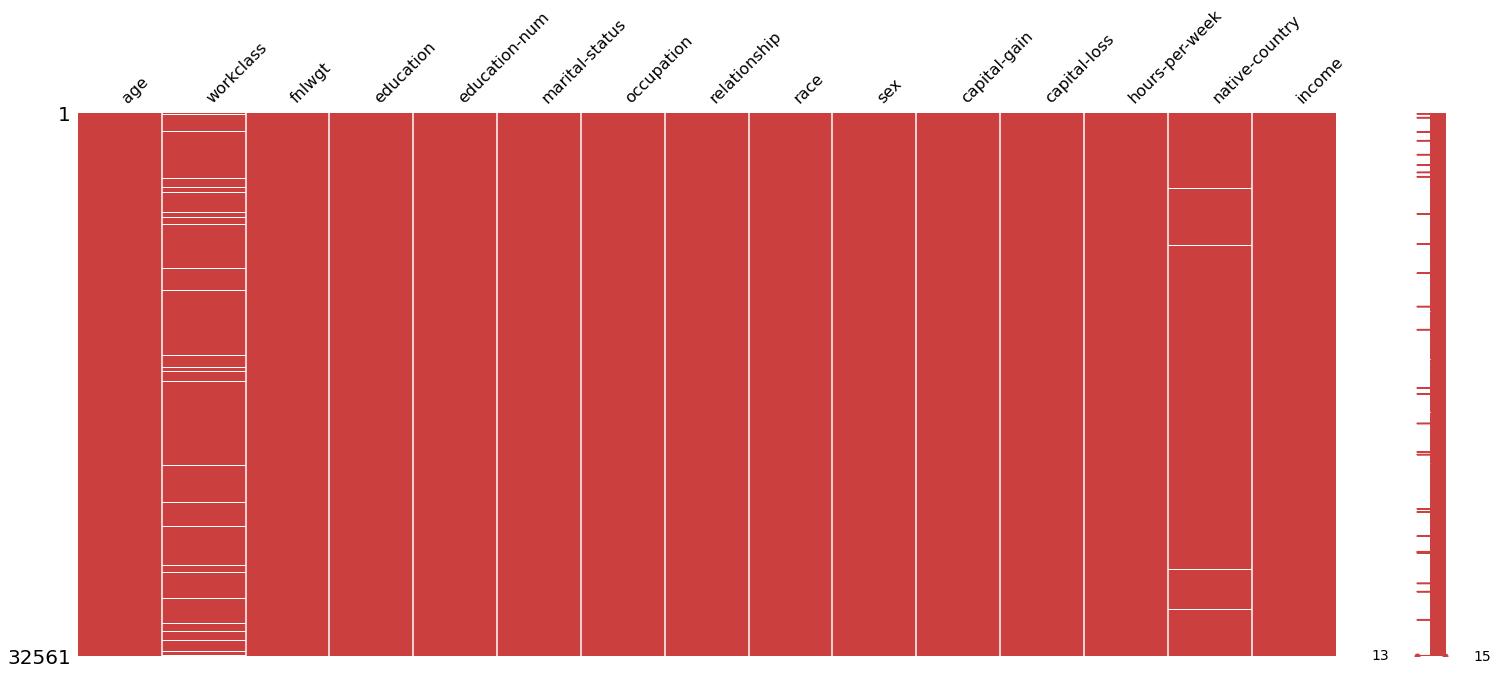

In [7]:
data = dfad.copy()
# Arbitrary Category Imputation for Categorical Data
data['occupation'] = data['occupation'].fillna('#Unknown#')

# Check how many missing values got updated
print(data['occupation'].value_counts())

data.info()

# Display missing values after imputation
msno.matrix(data,color=(0.80, 0.25, 0.25))
plt.show()

## 7) Frequent category imputation

------Before imputation most frequent categories------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Name: count, dtype: int64
--------------------------------------
occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Name: count, dtype: int64
--------------------------------------
native-country
United-States    29170
Mexico             643
Philippines        198
Name: count, dtype: int64
--------------------------------------------------------------------------------------
------After imputation most frequent categories------
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
Name: count, dtype: int64
--------------------------------------
occupation
Prof-specialty     5983
Craft-repair       4099
Exec-managerial    4066
Name: count, dtype: int64
--------------------------------------
native-country
United-States    29753
Mexico             643
Philippines        198
Name: co

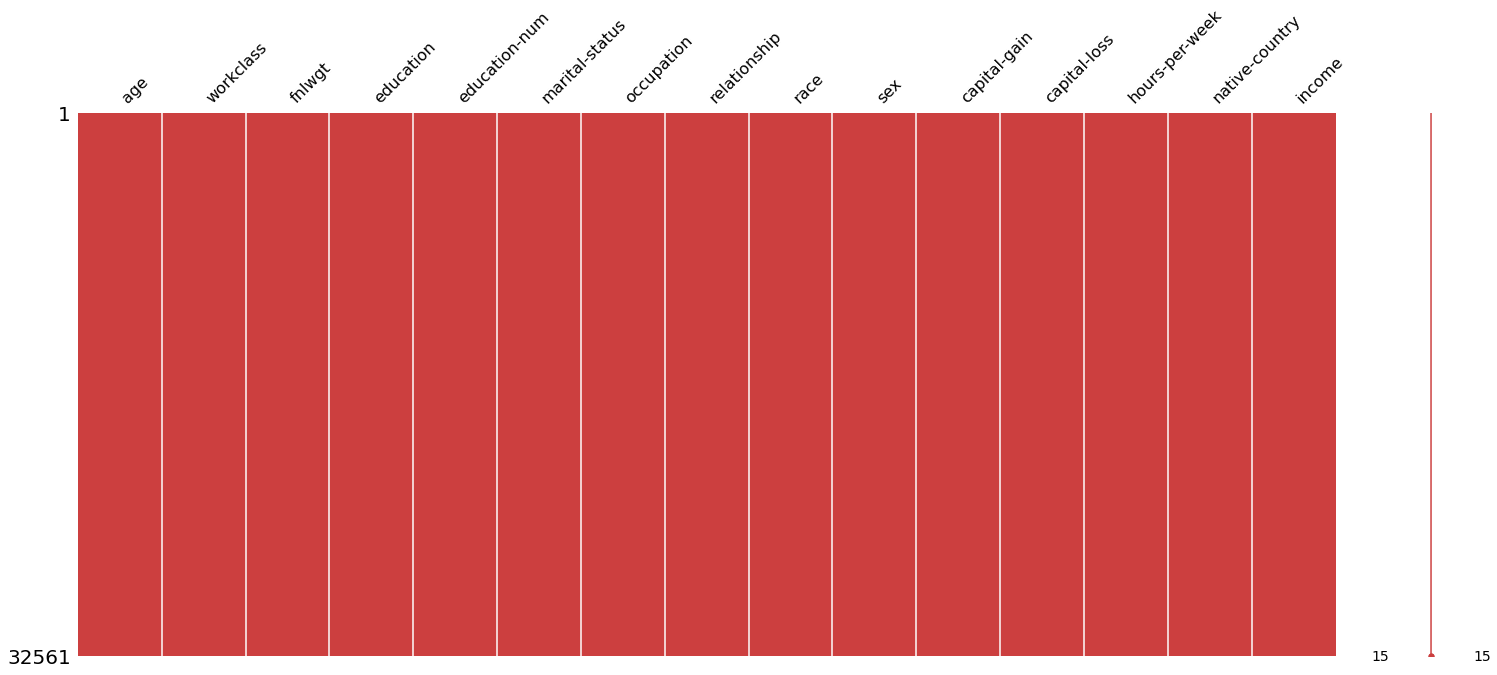

In [8]:
data = dfad.copy()
# Before imputation most frequent categories
print('------Before imputation most frequent categories------')
print(data[categorical_columns[0]].value_counts().head(3))
print('--------------------------------------')
print(data[categorical_columns[1]].value_counts().head(3))
print('--------------------------------------')
print(data[categorical_columns[2]].value_counts().head(3))

# Frequent Category Imputation for Categorical Data
frequent_imputer = CategoricalImputer(imputation_method='frequent', variables=categorical_columns)
data[categorical_columns] = frequent_imputer.fit_transform(data[categorical_columns])
print('--------------------------------------------------------------------------------------')
print('------After imputation most frequent categories------')
print(data[categorical_columns[0]].value_counts().head(3))
print('--------------------------------------')
print(data[categorical_columns[1]].value_counts().head(3))
print('--------------------------------------')
print(data[categorical_columns[2]].value_counts().head(3))

print('--------------------------------------')

msno.matrix(data,color=(0.80, 0.25, 0.25))
plt.show()

## 8) Arbitrary Value Imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   32561 non-null  int64 
 1   workclass             30725 non-null  object
 2   fnlwgt                32561 non-null  int64 
 3   education             32561 non-null  object
 4   education-num         32561 non-null  int64 
 5   marital-status        32561 non-null  object
 6   occupation            30718 non-null  object
 7   relationship          32561 non-null  object
 8   race                  32561 non-null  object
 9   sex                   32561 non-null  object
 10  capital-gain          32561 non-null  int64 
 11  capital-loss          32561 non-null  int64 
 12  hours-per-week        32561 non-null  int64 
 13  native-country        31978 non-null  object
 14  income                32561 non-null  object
 15  occupation_arbitrary  32561 non-null

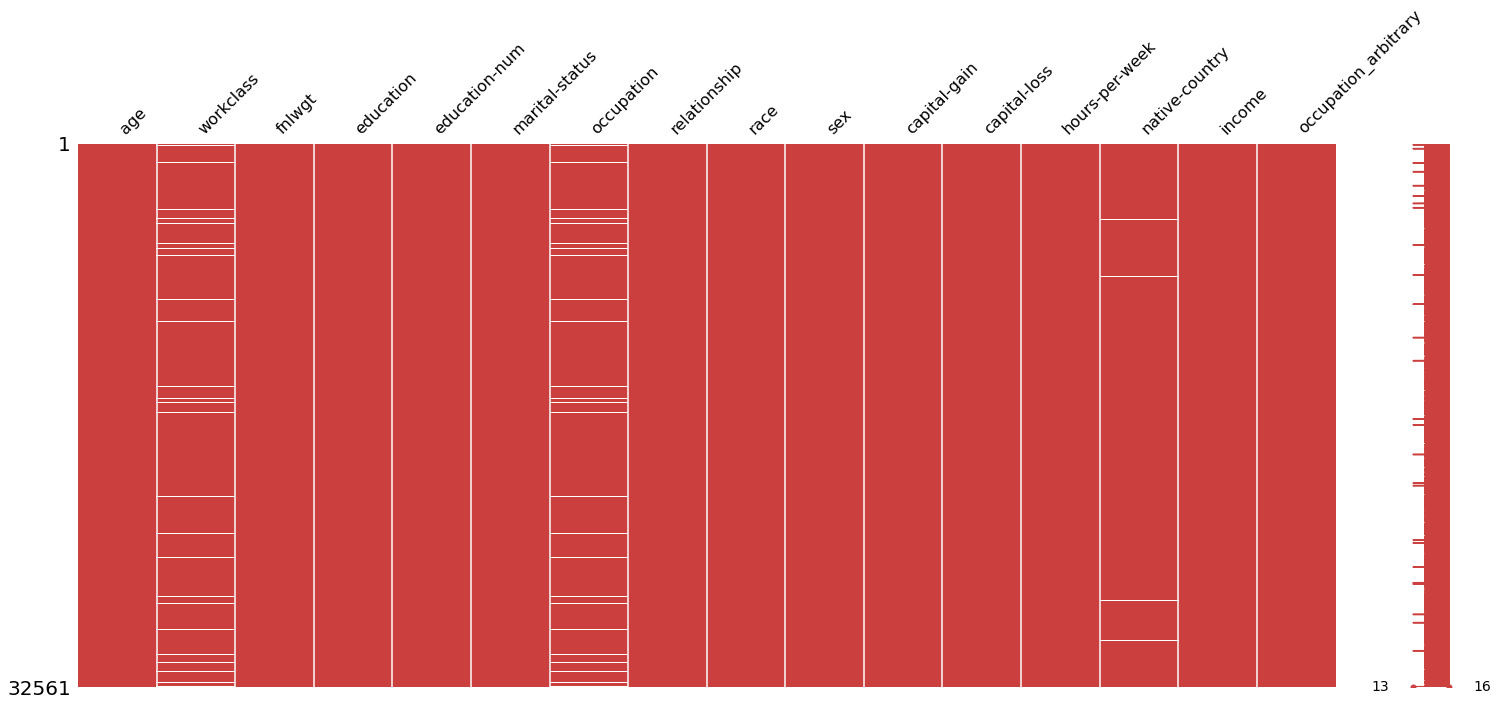

In [9]:
data = dfad.copy()
# Arbitrary Category Imputation for Categorical Data
data['occupation_arbitrary'] = data['occupation'].fillna('Missing')

data.info()
msno.matrix(data,color=(0.80, 0.25, 0.25))
plt.show()

## 9) Adding a variable to capture missing value

In [10]:
data = dfad.copy()
# Add Missing Indicator for Categorical Variables
data['occupation_Missing'] = data['occupation'].isnull().astype(int)

print('Mode for "occupation" : ', data['occupation'].mode()[0])

data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)

print(data['occupation_Missing'].value_counts())

data[data['occupation_Missing'] == 1].head()

Mode for "occupation" :  Prof-specialty
occupation_Missing
0    30718
1     1843
Name: count, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_Missing
27,54,NaN,180211,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K,1
69,25,NaN,200681,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,1
77,67,NaN,212759,10th,6,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,2,United-States,<=50K,1
106,17,NaN,304873,10th,6,Never-married,Prof-specialty,Own-child,White,Female,34095,0,32,United-States,<=50K,1
